# 회귀분석

Last updated 20191213FRI1111

## S.1 목차

* S.2 문제의 이해
* S.3 회귀식
* S.3.1 모델
* S.3.2 변수
* S.3.3 입력변수의 수에 따른 구분
* S.3.4 표준화에 따른 구분
* S.4 OLS
* S.4.1 데이터
* S.4.2 그래프
* S.4.3 선형 회귀식 풀기
* S.4.4 Python으로 미분해서 풀어보자
* S.4.5 R2
* S.5 matrix inverse method
* S.5.1 풀기
* S.5.2 데이터
* S.5.3 identity matrix
* S.5.4 $\beta$
* 문제: Matrix Inverse Method 회귀모델
* 문제: Matrix Inverse Method 회귀모델
* S.5.5 오류 계산
* S.5.6 sympy matrix
* S.6 gradient for linear regression
* 문제: 회귀식 그래프 함수
* S.7 정규화 회귀모형
* 문제 UCI Abalone
* S.8 Local Regression
* S.9 Ridge
* S.10 Lasso
* S.11 forward stagewise
* S.11 비선형 모델
* 문제 iris
* 문제: 주택가격의 회귀모델
* S.12 Spark
* 참조 ISLR 6장

## S.2 문제의 이해

어떤 값을 예측한다고 하고, 그 값에 영향을 미치는 변수들이 있다고 하자.
예측 값을 **출력변수 Output variables** 또는 **목표변수 Target variables**라고 하고,
영향변수를 **입력변수 Input variables**라고 한다.
예를 들어, 영화매출을 예측한다고 하자. 매출에 영향을 미칠 수 있는 변수로 평점, 광고비, 투자비, 개봉일 매출액, 조회수 등을 꼽을 수 있다.
회귀분석은 입력변수로부터 목표 값을 예측을 하는 문제에 사용한다.

## S.3 회귀식

### S.3.1 모델

$y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n
 = \beta_0 + \sum_{j=1}^n \beta_j x_j$

* x: 입력데이터 $\in \mathbb{R}^{i \times j}$
* y: 종속변수로서, 1개의 클래스 값을 가진다.
    * $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_i \end{pmatrix}$

위 식은 $x_0=1$인 경우 $y = \sum_{j=0}^n \beta_j x_j$
* $\beta$를 w로 표기하기도 한다. y=wx
* $\hat{w} = argmin_{w} (y-wx)^2$ 오류를 최소화 하는 $\hat{w}$를 찾음.

회귀모델은 벡터로 표현할 수 있으며, 이 경우 행 $i$와 열 $j$를 다음과 같이 표현할 수 있다.
* $x_{ij}$는 **i**번째 샘플(행)의 **j**번째 속성(열)이다. 또는 다른 알파벳 **m**행,**n**열로 표기하기도 한다.
* 또는 위첨자 superscript, 아래첨자 subscript를 이용하여 표기하기도 한다. $x^{(j)}_i$
    * 영어로 설명하면 이해하기 쉽다. 즉 위첨자 **Up**per는 알파벳 **U**로 시작하니 위에서 아래로 (**up**에서 down), 반면에 아래첨자 **l**ower는 왼쪽에서 오른쪽으로 (**l**eft to right) 구성된다 (Einstein 표기법이라 한다).
    * 위첨자 superscript (j)는 j번째 열
    * 아래첨자 subscript (i)는 i번째 행


### S.3.2 변수

변수는 크게 나누어 **숫자**, **문자** 값으로 구분할 수 있다.
숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다.

**명목변수 Categorical or nominal varaible**는 남녀 성별과 같이 순서가 없이 이름이 있는 변수를 말한다.
자동차 색과 같이 검은색, 흰색, 파란색이 예가 된다.
성별 또는 학위구분 같은 명목변수는 회귀식에 0,1의 값을 가지는 **dummy 변수**로 변환해서 사용한다.

**순위변수 Ordinal variable**은 어떤 **순서가 있는** 범주에 속하여 그 범주의 이름을 말한다.
'초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다.
소득수준을 '차상위', '중위', '상위'로 구분하면 **순위변수**에 해당된다.

여기서 범주를 등간격으로 **간격변수 Internal variable**이라고 한다.
자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

키, 몸무게와 같이 **연속 변수 Continuous variable**이 있다.

### S.3.3 입력변수의 수에 따른 구분

회귀식은 **입력변수에 대해 영향을 미치는 가중치를 주어 출력변수 값을 계산하는 식**이라고 할 수 있다.
출력변수는 숫자이고 입력변수는 하나 이상이 될 수 있다.

상관관계와 회귀분석은 여러 변수간의 관계를 분석하는 방법이란 공통점이 있다.
반면에 **상관관계**는 변수 간 관계의 강도를 -1 ~ 1 값으로 측정하는 것이고, **회귀분석**에서는 종속변수와 독립변수를 구분하여 설명하거나, 예측하는데 쓰인다.

입력변수에 따라 이진, 다중회귀분석으로 구분할 수 있다.
**이진회귀식 binary regression**은 두 변인 간의 관계를 나타내는 경우에 쓰인다.
**다중회귀식 multiple regression**은 변인이 복수인 경우를 말한다.

변수가 증가할수록 **overfitting**의 위험이 발생할 수 있다. 즉 bias는 감소하지만, variance는 증가하게 된다.
예를 들어 변수의 갯수(p)가 데이터 수(n) 보다 많아지게 되면, variance가 무한대로 증가한다.
이럴 경우, **shrinkage** 방식으로 모델의 variance를 줄이고, 정확성을 높일 수 있다.

모든 변수를 넣어서 모델을 만들 수 있지만, 그 보다는 **변수를 추가하면서 그 조합에서 RSS가 가장 적은 모델을 선택**하게 된다.
속성이 10개라면 1024개 모델, $2^{10}$의 조합이 가능하다. 속성이 40개 이상이면 $2^{40}$, 계산이 거의 불가능하다.

또는 변수를 하나씩 추가하면서 **stepwise**, 또는 순서를 정하지만, 먼저 넣어야할 변수와 아닌 경우로 계층화해서 (고기류는 먼저 넣고, 야채는 나중에) **hierachical** 방식으로 할 수 있다.
* forward selection: 후보변수 없이 null model에서 시작하여, 하나씩 후보변수를 추가 
* backward selection: 모든 후보변수를 넣고 full model에서 시작하고, 하나씩 제거

변수를 선택하는 기법으로 PCA (Principle Component Analysis)를 사용할 수 있다.

### S.3.4 표준화에 따른 구분

비표준화된 회귀식 unstandardized regression equation은 원래 데이터를 그대로 사용하기 때문에 직관적으로 이해할 수 있다.

$$ Y = a + bX $$

그러나 표준화된 standardized regression equation: 원시값(raw data)를 사용하는 것이 아니라 z값을 사용할 수 있다.

$$ z_y = \beta z_x $$

### S.3.5 general linear model

여러 변수로 구성된 선형적 관계의 모델을 말하는데, 이 때 오류 residuals가 **정규분포**를 따르는 경우를 말한다.
즉 general linear model은 결과 값이 정규분포일 경우, ANOVA, MANOVA, t-test, 선형회귀분석 등이 해당된다.
에러 $\epsilon_i \sim N(0,\sigma^2)$

$$ y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi} + \epsilon_i $$


> GLM 

> 일반화선형모델 (GLM: generalized linear model)은 입력변수와 예측변수를 선형관계로 모형화한다.
그러나 오류 Residuals가 정규분포를 따르지 않는 경우, 연결함수 link function을 통해 비정규화를 줄이려고 한다.
정규화가 아닌 분포는 여러 형태가 있을 수 있다. 이항 binomial, 포아손 Poisson, 베타 beta, 감마 gamma 등을 예를 들 수 있다.
종속변수가 이항분포인 경우 로지스틱을, 종속변수가 갯수인 경우 poisson으로 모델링한다.
generalized라는 단어는 선형, 로지스틱, 포아손을 **일반화 generalized**한 모델이라 그렇게 명명되었다.


## S.4 OLS

회귀식은 입력데이터 간의 관계를 나타내고, 그 관계로 인해 발생하는 오류를 최소화하도록 만들어진다.
오류는 **y실제 - $\hat{y}$예측 차이의 제곱**을 합계낸 값으로, 이를 **최소화**하는 지수를 구하면 최적식을 구할 수 있다.
$y-\hat{y}$은 음수가 나올 수도 있으므로 오류의 합계를 구하려면 제곱을 한다.
즉 OLS (Ordinary Least Square)를 최소화 사용하여 회귀식을 푼다.

### S.4.1 데이터

x,y 데이터를 생성해보자.

x | y
-----|-----
1 | 6
2 | 5
3 | 7
4 | 10

In [2]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

### S.4.2 그래프

```scatter(x,y)```로 각 좌표(x,y)를 나타내보자.
```subplot()```에는 3개의 인자가 사용된다 - 행, 열, 순서 (왼쪽 상단 1부터 시작해서 오른쪽으로 이동). 즉 **211은 2행 1열의 첫째**, **212는 2행 1열의 둘째**를 의미한다.

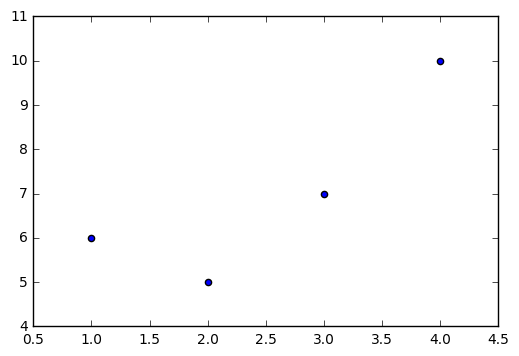

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

### S.4.3 선형 회귀식 풀기

아래 식이 성립한다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위 식을 모두 더해서 총오류를 구하면:

$f=210 + 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1$

위를 편미분하면:

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

이를 풀면:

$\beta_0 = 3.5$

$\beta_1 = 1.4$

예측 값 $\hat{y}$를 계산해보자.

각 x 값에 기울기 1.4를 곱하고, y절편 3.5를 더해서 구할 수 있다.

$yhat=3.5 + 1.4 x$

x는 벡터 값으로 요소별 '$x \times 1.4 + 3.5$'와 같이 덧셈, 곱셈이 가능하다.

In [3]:
yhat=x*1.4+3.5
print(yhat)

[ 4.9  6.3  7.7  9.1]


실제값과 예측값의 오류를 구해보자

In [4]:
yhat-y

array([-1.1,  1.3,  0.7, -0.9])

오류는 플러스, 마이너스 서로 상쇄될 수 있다. 오류의 제곱을 구하면 크기를 올바르게 알 수 있다.

In [5]:
np.sum(np.power(yhat-y,2))

4.1999999999999984

### S.4.4 Python으로 미분해서 풀어보자

편미분 partial derivatives은 변수 가운데 하나를 선정하고 나머지는 상수로 보고 미분하는 것이다.
예를 들어, 

$
f(x,y) = x^2 + xy + y^2\\
\frac{\partial{f}}{\partial{x}} = 2x + y
$

이를 Python sympy를 사용하면 편미분을 풀 수 있다.
```symbols('b0,b1')```는 따옴표 안의 b0,b1을 변수로 선언한다.
f함수를 b0, b1에 대해 미분을 해보자.

In [6]:
# differentiation
import sympy as sp
b0,b1=sp.symbols('b0 b1')

diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어이다.
diff(f,b1)는 f함수를 b1에 대해서 미분하는 명령어이다.

In [7]:
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)


이를 ```solve()```로 풀면 해를 구할 수 있다.
그리고 b0, b1을 구하면 위에서 구한 값과 동일한 결과가 나온다.

In [8]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


### S.4.5 $R^2$

$R^2$는 **종속변수 dependent variable의 분산을 독립변수 independent variable(s)로 얼마나 예측**할 수 있는지를 나타낸다.

TSS (Total Sum of Squared Errors ) = SSE (Sum of Squared Errors) + SSR (Residual Sum of Squared Errors)

$r^2=\frac{SSR}{TSS}$


#### data

In [1]:
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

numpy에서 해주었던 것과 같이 1을 넣어서 절편을 구해준다.

In [2]:
A=np.array([x,np.ones(9)])
print A

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]]


numpy에서 행과 열을 읽을 경우 인덱스로, 모든 행 (열)은 ```:```로 표기한다.
* **행**을 읽을 경우, 즉 ```i```행의 모든 열은 A[i,:] 또는 ```:```는 생략해서 A[i]로 읽고
* **열**을 읽을 경우, 즉 모든 행 ```:```의 ```j```열은  A[:,j]로 읽는다.
* **$x_{02}$ 또는 $x_{0}^{2}$**는 1번째 행(레코드), 3번째 컬럼(속성) A[0,2]로 읽는다.

In [5]:
A[0,:]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [7]:
A[:,1]

array([ 1.,  1.])

In [8]:
A[0,2]

2.0

#### numpy listsq

numpy의 ```listsq()```를 사용하여, 데이터의 회귀식 계수 w0, w1을 계산해보자.


In [4]:
w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

0.716666666667 19.1888888889


예측 값을 구해보자. 실제 값과 얼마나 차이가 나는지 비교해보자.

In [5]:
yhat=w0*x+w1
print yhat

[ 19.18888889  19.90555556  20.62222222  21.33888889  22.05555556
  22.77222222  23.48888889  24.20555556  24.92222222]


#### 그래프

예측 yhat과 실제 y의 그래프를 그려보자.
예측은 빨간 실선 (r-), 파란 점 (bo)로 그린다.

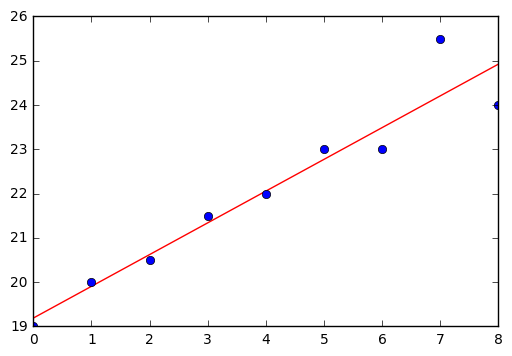

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

#### R squared


In [21]:
SSR = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/TSS
print r_squared

0.913838550247


adjusted R-squared는 독립변수의 개수에 따라 과도한 R2를 수정한 값이다.

$R^2\space adjusted=1 - \frac{(1-R^2)(n-1)}{n-k-1}$

* n은 데이터 개수
* k는 독립변수 개수

In [38]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1
print adjusted_r_squared

0.885118066996


In [10]:
import statsmodels.api as sm
result = sm.OLS(y,A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.66e-05
Time:                        15:52:00   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.0

## S.5 matrix inverse method

### S.5.1 풀기

$\hat{w}$ 최소해를 구해보자.
오류 e는 잔차를 제곱해서 더한 합계 'sum of squared residuals' 이다.
따라서,
$f = e.T \times e = (y-wx)^T (y-wx) = y^Ty - 2w(x^Ty)^T+w^Tx^Twx$

위를 미분하면 $\frac{\partial f}{\partial w} =
    0 -2(x^Ty)+2wx^Tx$

위 미분 값을 0으로 놓고 풀면, $-2x^Ty + 2\hat{w}x^Tx = 0$

위 식을 정리하면 $\hat{w} = (X^T X) ^{-1} X^T y$


### S.5.2 데이터

입력변수 x1, x2로부터 출력변수 y가 있다고 하자.
$2x_1 - 4x_2 = 8$

$3x_1 + 6x_2 = 9$

In [1]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [2]:
print "x: ", x, "y: ", y

x:  [[2, -4], [3, 6]] y:  [8, 9]


```set_printoptions(precision=2, suppress=True)```는 출력 자릿수를 2자리로 제한할 수 있다.

In [3]:
np.set_printoptions(precision=2, suppress=True)

In [4]:
xI = np.linalg.inv(x) 
print "x inv: \n", xI

x inv: 
[[ 0.25  0.17]
 [-0.12  0.08]]


### S.5.3 identity matrix

x*xI는 1, 즉 identity matrix가 된다.

In [5]:
print "identity matrix 'x * xI': \n", np.dot(x,xI)

identity matrix 'x * xI': 
[[ 1.  0.]
 [ 0.  1.]]


identity matrix는 ```np.eye()```로 구할 수 있다.

In [6]:
print np.eye(2)

[[ 1.  0.]
 [ 0.  1.]]


In [7]:
print np.eye(2) == np.dot(x,xI)

[[ True  True]
 [ True  True]]


### S.5.4 $\beta$

위 식을 행렬로 나타내면,
$\beta \times x = y$

양변에 $x^{-1}$를 곱하면 아래 식이 된다.

$x^{-1}\times x\times \beta=x^{-1}\times y$

inverse에 원래의 벡터를 곱하면 identity matrix가 된다.

즉 $x^{-1}\times x=1$이므로

아래와 같이 $\beta$를 구할 수 있다.

$\beta=x^{-1}\times y$

#### inverse 계산

**$xx^{-1}=I$**인 $x^{-1}$가 존재하면 x는 invertible이라고 한다.


```np.array()```는 ```np.linalg.inv()```, ```np.mat()```는 ```x.I```로 inverse를 계산한다.

In [17]:
# matrix inverse
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)
print "v={0}\nv.I={1}".format(v,vI) #([[-2.5, 1.5], [ 2. , -1. ]])

v=[[2 3]
 [4 5]]
v.I=[[-2.5  1.5]
 [ 2.  -1. ]]


inverse를 산식으로 계산하면 다음과 같다.

In [18]:
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
print left*right #array([-2.5,  1.5,  2. , -1. ])

[-2.5  1.5  2.  -1. ]


#### inverse로 $\beta$ 계산

matrix inverse method를 풀어보자.
numpy array로 행렬을 선언하고,
다음 식을 ```np.dot()```, ```np.linalg.inv()``` 함수를 이용해서 풀면 x1, x2를 구할 수 있다.


* $y = \beta x$인 경우, 양변을 $x^{-1}$로 곱하면
* $x^{-1}y = \beta x^{-1}x$ 여기서 $xx^{-1}=1$이므로 
* $\beta=x^{-1}\times y$

$
2 \times w1 - 4 \times w2 = 8\\
3 \times w2 + 6 \times w2 = 9
$

In [10]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

In [11]:
xI=np.linalg.inv(x)

In [12]:
w1,w2=np.dot(xI,y)
print(w1,w2)

(3.5, -0.25)


위에서 구한 값을 대입해서 식을 풀어보자.
주어진 데이터로 풀어서 얻은 w1, w2를 넣어서 구한 값은 8, 9이다.
오류가 전혀 없이 실제 값이 구해진다.

In [13]:
print 2*w1+(-4)*w2
print 3*w1+6*w2

8.0
9.0


```numpy.linalg.solve()```는 선형 벡터 식을 풀 수 있다

위의 x,y를 넣으면 값을 구할 수 있다.

In [14]:
print np.linalg.solve(x,y)

[ 3.5  -0.25]


## 문제: Matrix Inverse Method 회귀모델

x: 1,2,3,4
y: 6,5,7,10의 경우 회귀식을 도출해 보자.
답은 y=3.0 + 1.7x

### 데이터

주어진 x, y에서 numpy array를 생성한다.

In [15]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

절편을 구하기 위해 '1'을 추가한다.
즉 x0, x1으로 구성하고, 해당하는 w0, w1을 계산한다.

식을 y = wx로 다시 쓸 수 있다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


주의할 점은 x를 [x 1]로 변환한다는 점이다. 절편 값을 구하기 위해서 그렇게 해야 한다.

아래 데이터는 w1, w0을 각 행으로 구성하고 있다.

```python
[ 1.  1.]
[ 2.  1.]
[ 3.  1.]
[ 4.  1.]
```

$6 = \beta_1 \times 1 + \beta_0 \times 1$

$5 = \beta_1 \times 2 + \beta_0 \times 1$

$7 = \beta_1 \times 3 + \beta_0 \times 1$

$10 = \beta_1 \times 4 + \beta_0 \times 1$

원래의 데이터가 x는 행 2, 열 4로 구성되어서, transpose해야 4,2로 변환된다.

> 1차원 Transpose

> 1차원의 ```x.T*x```를 구해보자.
numpy array **1d**는 ```[...,...,...]``` 형식으로 구성된다.
**1d는 transpose를 해도 1d로 변환이 되지 않는다**.
이럴 경우 ```[[],[]]```로 만들어 trasnpose해야 한다.
numpy array에 ```[]```를 추가해서 ```[[],[]]```으로 변환해준다.
또는 asmatrix() 함수를 사용하여 array 1d를 2d인 matrix로 변환한다.
```python
np.array([[1,2,3,4]])
np.asmatrix([1,2,3,4])
```
그 결과 [1,2,3,4]가 ([[1],[2],[3],[4]])로 변환이 된다.

In [14]:
x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]


In [15]:
print x.shape,x.T.shape

(4, 2) (2, 4)


### matrix inverse

matrix inverse를 구한다.

In [16]:
np.dot(x,x.T)

array([[  2.,   3.,   4.,   5.],
       [  3.,   5.,   7.,   9.],
       [  4.,   7.,  10.,  13.],
       [  5.,   9.,  13.,  17.]])

In [17]:
np.linalg.inv(np.dot(x,x.T))

LinAlgError: Singular matrix

자신에게 자신의 Transpose를 곱한 결과이다.
그 결과는 singular matrx이다.
이 의미는 가역행렬이 아니라는 의미이다. 즉 inverse를 할 수 없다.
해가 없거나, 여러 개가 있다는 의미이다.
```np.linalg.inv(singular maxtrix)```는 오류가 난다.

단, ```np.linalg.lstsq()```는 그 중 **최소자승법에 따라 가장 적합한 해**를 구해준다.

> singular matrix
> 위 결과는 singular matrix이다.
1d matrix를 자신의 transpose로 곱하면 singular matrix가 된다.
**첫째 행의 2배, 3배, 4배로 행이 구성되어 실제 1행만이 독립적인 값을 가지고 있다**.
singlular matrix의 inverse()는 할 수 없다.
다음과 같은 singular matrices는 inv() 연산을 할 수 없다.
```python
np.linalg.inv(np.array([[3,5],[6,10]]))
```

x (4,2), x.T (2,4)의 dot()을 구하면 (4,4)
순서를 바꾸면 x.T (2,4) x (4,2) -> (2,2)이 된다.

In [18]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

('xTx=', array([[ 30.,  10.],
       [ 10.,   4.]]))


In [20]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 0.2, -0.5],
       [-0.5,  1.5]]))


In [21]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

('xTyT=', array([ 77.,  28.]))


In [22]:
print("weights=",np.dot(xTxI,xTyT))

('weights=', array([ 1.4,  3.5]))


좀 복잡하지만, 한 줄로 줄여서 연산해도 된다.

In [23]:
np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

array([ 1.4,  3.5])

### numpy 최소자승법

데이터는 위 연습에서 사용했던 데이터를 그대로 사용하자.
앞서 가역행렬의 문제로 풀 수 없던 문제를 numpy 최소자승법으로 풀어보자.


```numpy.linalg.lstsq()```에는 컬럼벡터 x를 적어준다.
그 결과는 앞서 계산값과 일치한다.

함수의 입력을 적어준다.
* 독립변수 ```x```
* 종속변수 ```y```

그 반환 값은 가중치 weights이다. 독립변수 각 각에 대한 가중치이다.
$y=w_1\times x + w_0$ 순서대로 출력한다.

In [43]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([ 1.40,  3.50]), array([ 4.20]), 2, array([ 5.78,  0.77])))


w0,w1는 위에서 풀었던 해와 동일하게 계산된다.


In [42]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000006, '\nw0=', 3.4999999999999978)


### 정리하면

회귀선을 numpy 최소자승법으로 구하고, 실제 데이터와 같이 그래프를 그려보자.

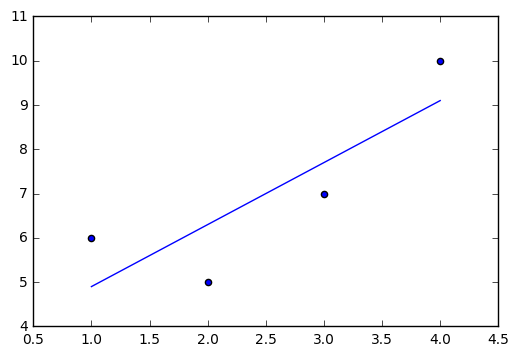

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

## 문제: Matrix Inverse Method 회귀모델

데이터

x1 [1,2],[1,4],[1,6]
y1 3,6,7

w0, w1으로 A를 구성해보자.

In [1]:
import numpy as np
x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])

In [2]:
print(x1.shape,y1.shape)

((3, 2), (3,))


주의할 점은 이번에는 1 컬럼의 순서가 뒤바뀌었다.

In [3]:
print x1

[[1 2]
 [1 4]
 [1 6]]


* ```X.T*X```는 array는 ```dot()```함수로 연산을 한다.
* 그 값의 inverse를 구한다.
* ```X.T*Y``` 역시 array는 ```dot()```함수로 연산을 한다.

In [4]:
xTx=np.dot(x1.T,x1)
print("xTx=",xTx)

('xTx=', array([[ 3, 12],
       [12, 56]]))


In [5]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 2.33333333, -0.5       ],
       [-0.5       ,  0.125     ]]))


In [6]:
xTyT=np.dot(x1.T,y1)
print("xTyT=",xTyT)

('xTyT=', array([16, 72]))


In [8]:
print("weights=",np.dot(xTxI,xTyT))

('weights=', array([ 1.33333333,  1.        ]))


마직막으로 원하는 입력변수의 가중치를 구할 수 있게 된다.
입력 컬럼에 해당하는 가중치 $y= w_0 \times x_0 + w_1\times x_1$ 순서대로 출력한다.

즉, $w_0$은 첫째 컬럼인 절편 $x_0$, $w_1$은 둘째 컬럼인 $x_1$에 대한 계수이다.

In [7]:
np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

array([ 1.33333333,  1.        ])

In [10]:
w0, w1 = np.linalg.lstsq(x1, y1)[0]
print(w0,w1)

(1.3333333333333306, 1.0000000000000004)


### S.5.5 오류 계산

오류는 실제 y와 예측과 얼마나 차이가 있는지를 보여준다.
물론 벡터는 반복문을 사용하지 않아도 연산이 가능하다.
아래는 반복문을 사용하여 각 y값의 오류를 출력하고 있다.
```format()``` 함수는 인자의 순서와 출력형식을 설정해서 출력하여 준다.
예를 들어, **```{1:.2f}```**는 두 번째 float를 소수점 2자리로 출력하게 된다.

In [30]:
print "i\t오류\ty\t예측"
print "--\t-----\t-----\t-----"
for i in range(len(x1)):
    predicted=w0*x1[i][0] + w1*x1[i][1]
    error=y1[i]-predicted
    print("{0:2d}\t{1:.2f} =\t {2}  -\t{3:.2f}".format(i,error,y1[i],predicted))

i	오류	y	예측
--	-----	-----	-----
 0	-0.33 =	 3  -	3.33
 1	0.67 =	 6  -	5.33
 2	-0.33 =	 7  -	7.33


벡터로 계산해보자.
우선 w를 array로 만들어 준다.

In [104]:
w=np.array([w0,w1])

x1,w의 ```dot()``` 연산을 하기 위해 차원을 맞추어 준다.

In [105]:
x1.shape,w.shape

((3, 2), (2,))

In [106]:
w=w[:,np.newaxis]
print w.shape
print w

(2, 1)
[[ 1.33]
 [ 1.  ]]


dot()연산으로 예측치를 출력할 수 있다.

In [102]:
pred=np.dot(x1,w)
print pred

[[ 3.33]
 [ 5.33]
 [ 7.33]]


### S.5.6 matrix

지금까지는 array로 풀어보았다. matrix 연산을 해보자.  matrix의 역행렬은 간편하게 ```I``` 로 계산하고 있다.
위와 동일한 계수가 계산되었다.

In [14]:
import numpy as np
X=np.matrix([[1,2],[1,4],[1,6]])
Y=np.matrix([3,6,7])
xTx=X.T*X

In [15]:
xTxI=xTx.I  #inversible as xTx.det() (3*56 - 12*12) != 0

In [16]:
xTyT=X.T*Y.T

In [17]:
print("weights=",xTxI*xTyT) #1.33 1.00 thus y=1.33+1.00x1+e

('weights=', matrix([[ 1.33333333],
        [ 1.        ]]))


## S.6 Gradient 알고리즘


### gradient란?
기울기 하강법 Gradient decent algorithm은 **오류를 점차 줄여가는 기울기를 선택하가면서 최적해**를 찾는다.

gradient는 경사도를 말한다.
처음에는 무작위 값에서 출발하여, 오류를 줄여가는 방향으로 경사도를 줄여가며 최적해를 찾아가는 방법이다.
경사방법 Gradient algorithm은 **greedy 탐욕알고리즘**으로, 경사도를 선택하여 답을 찾아가지만, 그 답이 최적이라는 보장은 없다.
오류함수가 2차함수인 경우 **local optimum**이 곧 global optimum이 된다.
탐욕적으로 계속 최적해를 구해나가야 한다.

OLS방법을 보편적으로 사용한다. 미분해서 풀 수 있지만, 변인의 갯수만큼 방정식을 풀어야 한다.
극대점을 찾기 위해서는 gradient 방향으로 오르는 것을 gradient ascent, 반대는 gradient descent(ascent)로 반복을 하면서 계수를 구한다.
(matrix 연산은 $n^{2.373}$이 소요된다는 연구)

### gradient ascent algorithms

최적해는 h(x)와 y가 최소화하도록, 가장 근사하게 예측할 수 있는 weights $\theta$를 추정한다.
* hypothesis
    * $h_{\theta}(x)=\sum_{i=0}^n(\theta^Tx)$

    * $h_{\theta}(x) = \theta_0 + \theta_1x_1 + \ldots + \theta_nx_n$ ($x_0=1$ 일 경우)

* cost function 오류는 가장 많이 쓰이는 **MSE Mean Squared Error**로 다음과 같이 나타낼수 있다.
예측과 실제의 차이를 서로 상쇄하지 않도록 제곱을 하고, 갯수로 나누어 평균을 구하는 식이다.
    * $J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$

참조: http://www.statisticsviews.com/details/feature/5722691/Getting-to-the-Bottom-of-Regression-with-Gradient-Descent.html

### gradient 계산

gradient는 그 점에서의 **기울기**로서 방향, 크기를 나타낸다.
벡터의 gradient는 '각 변수에 대한 f의 편미분 벡터'이다.

$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$

$x_{n+1}=x_n-\gamma_n \nabla F(x_n),\ n \ge 0$이면
$F(x_0)\ge F(x_1)\ge F(x_2)\ge \cdots$이므로 결국 **최소값 local minimum**에 도달하게 된다.

예를 들어, $f(x,y) = x^2 + y^2$의 gradient를 구하면

$
\nabla f= \frac{\partial{f}}{\partial{x}},\
\frac{\partial{f}}{\partial{y}} = (2x,2y)
$

따라서 (1,1)에서 f값이 최대로 증가하는 방향은 (2,2)
그 기울기 (오류)는 $||(2,2)|| = \sqrt{2^2 + 2^2} = \sqrt{8}$

* 앞서 정의한
    * Hypothesis: $h_\theta(x) = \theta^T x$
    * Loss: $(h_\theta(x)-y)$
* 위 cost function에 대해 gradient를 구하면

$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    &=\frac{\partial}{\partial{\theta_j}} \frac{1}{2} (h_{\theta}(x) - y)^2\\
    &=2 \cdot \frac{1}{2} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    &=(h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    &=(h_{\theta}(x) - y) x_j
\end{align}
$

위 식을 보면, **gradient는 오류에 x를 dot연산**해서 얻어진다.

오류에 상수항을 넣어서 계산해도 마찬가지이다.

* $J(\theta)$ $Error=\frac{1}{n} \sum_{i=1}^n(y_i - (ax_i+b))^2$

오류를 편미분해서 기울기 gradient를 a,b에 대해 구하면 다음과 같다. **$x_0=1$이면 당연히 위 식 하나로 a만 구하면 된다**.
* $\frac{\partial}{\partial{a}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-x_i)$
* $\frac{\partial}{\partial{b}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-1)$

### 갱신

$\alpha$는 학습비율 Learning Rate이며, 아래 값이 처음에는 큰 값으로 조정하다가, 반복이 계속될수록 적어지면서 0에 가까워질 때까지 현재 $\theta$를 갱신해 나간다.

$\theta_j := \theta_j - \alpha(h_\theta(x)-y)x_{j})$

$\theta_j := \theta_j - \alpha (y^{(i)}-h(x^{(i)}))x_j^{(i)}$

### batch, stochastic

* **batch gradient**, 학습데이터를 모두 일괄적으로 합계내어, 모델을 갱신함 (deterministic)
    * 반복:
        * $\theta$ $\forall i$
* **stochastic gradient descent** (incremental gradient descent) 데이터를 하나씩 사용하여, 모델을 갱신함. 따라서 결과가 batch와 다를 수 있슴.
    * 반복
        * for i in range(m):
            * $\theta$ 갱신 $\forall i$

### 의사코드

* 모든 계수 $\theta = 1$ (또는 무작위)
* 반복
    * $\theta$ 갱신
        * $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위를 $\beta_0$에 대해 편미분하면:

$\frac{\partial f}{\partial \beta_0} = $

$2 \times (6 - \beta_0 - \beta_1 \times 1) \times (-1)$

$2 \times (5 - \beta_0 - \beta_1 \times 2) \times (-1)$

$2 \times (7 - \beta_0 - \beta_1 \times 3) \times (-1)$

$2 \times (10 - \beta_0 - \beta_1 \times 4) \times (-1)$

위 식을 풀어서 더하면

$ -12 + 2\beta_0 + 2\beta_1$

$- 10 + 2\beta_0 + 4\beta_1$

$ -14 + 2\beta_0 + 6\beta_1$

$ -20 + 2\beta_0 + 8\beta_1$

위 식을 모두 더해서 총오류를 구하면:

$8\beta_0 + 20\beta_1 - 56$

위를 $\beta_1$에 대해 편미분하면:

$\frac{\partial f}{\partial \beta_1} = $

$2 \times (6 - \beta_0 - \beta_1 \times 1) \times (-1)$

$2 \times (5 - \beta_0 - \beta_1 \times 2) \times (-2)$

$2 \times (7 - \beta_0 - \beta_1 \times 3) \times (-3)$

$2 \times (10 - \beta_0 - \beta_1 \times 4) \times (-4)$

위 식을 풀어서 더하면

$ -12 + 2\beta_0 + 2\beta_1$

$ -20 + 4\beta_0 + 8\beta_1$

$ -42 + 6\beta_0 + 18\beta_1$

$ -80 + 8\beta_0 + 32\beta_1$

위 식을 모두 더해서 총오류를 구하면:

$20\beta_0 + 60\beta_1 - 154$

위에서 구한 2개의 식은:

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

In [4]:
import sympy as sp
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
b0,b1=sp.symbols('b0 b1')
np.sum(-2 * (y-(b0+x.dot(b1))))

8*b0 + 20*b1 - 56

$\beta_0 = 1, \beta_1 = 1$ 이면
각각 -28, -74이다.

이 값을 대입해서, 새로운 bo, b1을 구하면:

* new b0 = 1 - 0.01 * (-28) = 1.28
* new b1 = 1 - 0.01 * (-74) = 1.74

## x, y

In [1]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

In [2]:
x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T
print x, x.shape

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]] (4, 2)


## theta

우리가 구하려는 theta는 처음에 1로 설정한다.

In [3]:
theta=np.array(np.ones([x.shape[1]]))
print theta

[ 1.  1.]


## h(x)

In [4]:
print x*theta
print np.dot(x,theta)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]
[ 2.  3.  4.  5.]


함수로 만들어보자.

In [5]:
def h(x,theta):
    return np.dot(x,theta)

h(x,theta)

array([ 2.,  3.,  4.,  5.])

## gradient

### error

In [8]:
error=h(x,theta)-y
print error

[-4. -2. -3. -5.]


### gradient

```python
np.sum(y-h)*(-2)/len(x)의 결과는 -7
np.sum((y-h)*x)*(-2)/len(x) 결과는 -18.5
```

$x_0$은 1이므로 위는 ```np.dot(x.T,error)```로 바꿔쓸 수 있다.

아래 결과는 x 길이로 나누어주어서 그렇다.

In [9]:
print np.sum(y-h(x,theta))*(-2)/len(x)

-7.0


In [10]:
gradient=np.dot(x.T,error)
print gradient

[-37. -14.]


### update

기울기에 학습률을 곱하여 빼주면 theta를 갱신하게 된다.

In [11]:
alpha=0.01
theta -= alpha*gradient
print theta

[ 1.37  1.14]


In [12]:
#def gradientDescent(x, y, theta, alpha, m, numIterations):
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)
#    return theta

Iteration 0 | theta [ 1.37  1.14] Cost 6.75000
Iteration 100 | theta [ 1.79291203  2.34479071] Cost 0.63779
Iteration 200 | theta [ 1.61550957  2.86637557] Cost 0.55893
Iteration 300 | theta [ 1.51820553  3.15246131] Cost 0.53521
Iteration 400 | theta [ 1.46483493  3.3093774 ] Cost 0.52807
Iteration 500 | theta [ 1.43556152  3.3954448 ] Cost 0.52592
Iteration 600 | theta [ 1.41950525  3.44265218] Cost 0.52528
Iteration 700 | theta [ 1.4106985   3.46854511] Cost 0.52508
Iteration 800 | theta [ 1.40586805  3.48274721] Cost 0.52503
Iteration 900 | theta [ 1.40321859  3.49053696] Cost 0.52501
Iteration 1000 | theta [ 1.40176537  3.49480959] Cost 0.52500
Iteration 1100 | theta [ 1.4009683   3.49715309] Cost 0.52500
Iteration 1200 | theta [ 1.4005311   3.49843849] Cost 0.52500
Iteration 1300 | theta [ 1.40029131  3.49914352] Cost 0.52500
Iteration 1400 | theta [ 1.40015978  3.49953023] Cost 0.52500
Iteration 1500 | theta [ 1.40008764  3.49974233] Cost 0.52500
Iteration 1600 | theta [ 1.40004

## 문제: 회귀식 그래프 함수

온도 19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24로부터 회귀식을 도출하고, 그래프를 그려보자.

### 데이터

x는 단순히 기간으로 하고, y는 문제에 주어진 데이터로 하자.

In [2]:
import numpy as np

x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

### numpy 회귀식

상수를 도출하기 위해 '1' 행을 추가하자.

In [3]:
A=np.array([x,np.ones(len(x))])

In [7]:
print A, A.T

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]] [[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]]


In [4]:
w=np.linalg.lstsq(A.T,y)[0]
fitted=w[0]*x+w[1]
print fitted

[ 19.18888889  19.90555556  20.62222222  21.33888889  22.05555556
  22.77222222  23.48888889  24.20555556  24.92222222]


### 그래프

그래프의 markers는 색, 마커, 선모양으로 설정한다.
* 'bo-'는 줄여서 blue, marker 원, linestyle은 선으로 (linestyle='-', marker='o', color='b')
* 'r.-'는 빨간색으로 점(.)을 선(-)으로 이음.

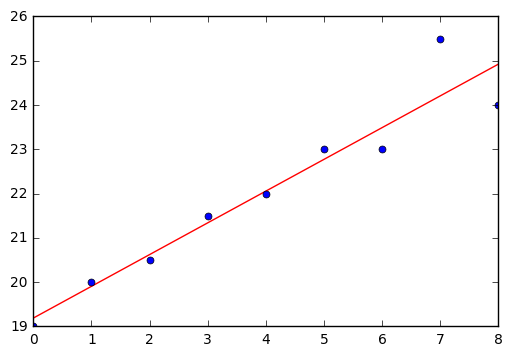

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x,fitted,'r-',x,y,'o',markersize=5)
plt.show()

### 함수로 만들기

In [10]:
def drawRegress2d(x,y):
    """
    Parameters
    ----------
        arg1: list or array
        arg2: list or array
    Returns
    -------
        None
    Examples
    --------
        x=np.arange(0,9)
        y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
        drawRegress2d(x,y)
    """
    import matplotlib.pyplot as plt 
    import numpy as np
    A=np.array([x,np.ones(len(x))])
    w=np.linalg.lstsq(A.T,y)[0]
    fitted=w[0]*x+w[1]
    #plt.plot(x,y,'r-',xi,y,'o',markersize=5)
    plt.plot(x, y, 'o-', label='Original data', markersize=5)
    plt.plot(x, fitted, 'r', label='Fitted line')
    plt.show()


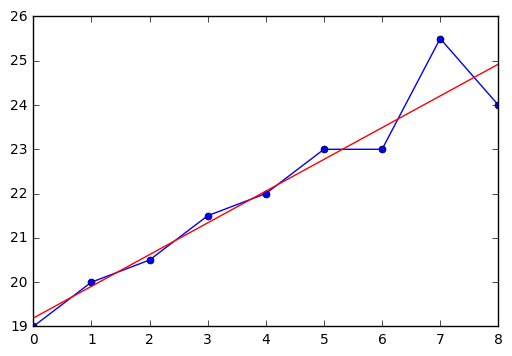

In [11]:
%matplotlib inline

import numpy as np
x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
drawRegress2d(x,y)


## S.7 정규화 회귀모형

정규화 regularization는 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화 overfitting 되는 현상을 막는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 따라서 정규화 방법에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다. OLS weights를 줄이는 방식 (0까지 줄이면 속성 제거 효과). 일반적으로 다음과 같은 세가지 방법이 사용된다. 

* **Ridge** 오류함수에 가중치의 제곱합, 즉 L2를 최소화하는 제약조건을 추가한다. L1과 마찬가지로 가중치가 너무 크지 않은 방향으로 학습하게 된다.
    * $\lambda=0$이면 variance증가, bias=0
    * $\lambda$가 증가하면 variance감소, bias증가
* **Lasso** 오류함수에 가중치의 절대값, 즉 L1을 더해준다.
L2와 마찬가지로 가중치가 너무 크지 않은 방향으로 학습되게 한다.
* **Elastic Net** L1 + L2, 즉 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.


## 문제: UCI Abalone

전복의 나이를 예측하는 문제이다.
전복은 껍질에 둥근 테 ring이 있는데, 이를 보고 나이를 판별할 수 있다.
이런 둥근 테의 갯수에 1.5를 더하면 계산할 수 있다 (Mayukh, 2010).
전복은 암치와 수치가 서식지가 서로 달라 먹이가 다르기 때문에, 내장의 색이 다르다. 내장 색이 짙은 녹색이면 암치, 황색이면 수치이다. 
전복의 성별 및 크기 관련 정보를 가지고 rings에 대해 회귀식을 도출해보자.

* Mayukh, H. (2010). Age of Abalones using Physical Characteristics: A Classification Problem. ECE 539 Fall 2010 Project Report University of Wisconsin-Madison, 1-4.
* https://ericstrong.org/predicting-abalone-rings-part-1/

### 데이터 읽기

데이터는 UCI Machine Learning Repository에서 제공하고, 전복관련 총 4177 건이 저장되어 있다.
변수는 sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, rings 개수.
마지막 **rings 갯수**가 예측해야 하는 종속변수이다.

In [1]:
import pandas as pd
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [2]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


무작위로 데이터를 선별해서 잘 읽혔는지 보자.

In [3]:
abalone.sample(n=10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
1111,I,0.520,0.380,0.125,0.5545,0.2880,0.1295,0.1670,8
2981,F,0.505,0.380,0.130,0.6930,0.3910,0.1195,0.1515,8
852,M,0.565,0.450,0.155,1.0595,0.4735,0.2400,0.2650,10
2828,M,0.520,0.400,0.105,0.8720,0.4515,0.1615,0.1985,9
3836,M,0.410,0.325,0.100,0.3555,0.1460,0.0720,0.1050,9
3444,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450,9
1648,M,0.590,0.490,0.165,1.2070,0.5590,0.2350,0.3090,10
3913,I,0.540,0.400,0.145,0.7570,0.3150,0.1810,0.2150,11
3403,I,0.350,0.265,0.110,0.2090,0.0660,0.0590,0.0750,9
1233,I,0.370,0.280,0.085,0.2170,0.1095,0.0350,0.0620,6


### 데이터 기초통계

data의 기초 통계를 살펴보자.
**rings** 갯수는 1 ~ 29 정도로 분포되어 있다 
데이터 갯수가 4177로 일치하는지, 그렇지 않다면 결측 값이 있다는 것이다.
평균, 표준편차, 최대, 최소를 보면서 outlier를 확인한다.
**특이하게 height가 0**인 경우가 있다.

In [4]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


height가 없는 경우를 살펴보자.
이 경우 데이터가 0인 이유를 알 수 없는 경우, (1) 평균으로 대체하거나, (2) 모두 결측으로 처리할 수 있다.
여기서는 모두 제거한다.

In [5]:
abalone = abalone[abalone['height']>0]

In [6]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 상관관계

seaborn에서 제공하는 pairplot은 변수 간 상관관계를 시각화하여 준다.
seaborn은 그 자체로는 그래프를 그릴 수 없다.
matplotlib을 기반으로 하기 때문에 이를 import하고 ```plt.show()```
**hue**는 변수명을 선택하여 다른 색으로 그래프를 나타낸다.
이때 **diag_kind**를 ‘auto’, ‘hist’, ‘kde’ 가운데서 고르거나, 선택적 optional으로 정의하여 모양을 다르게 할 수 있다.

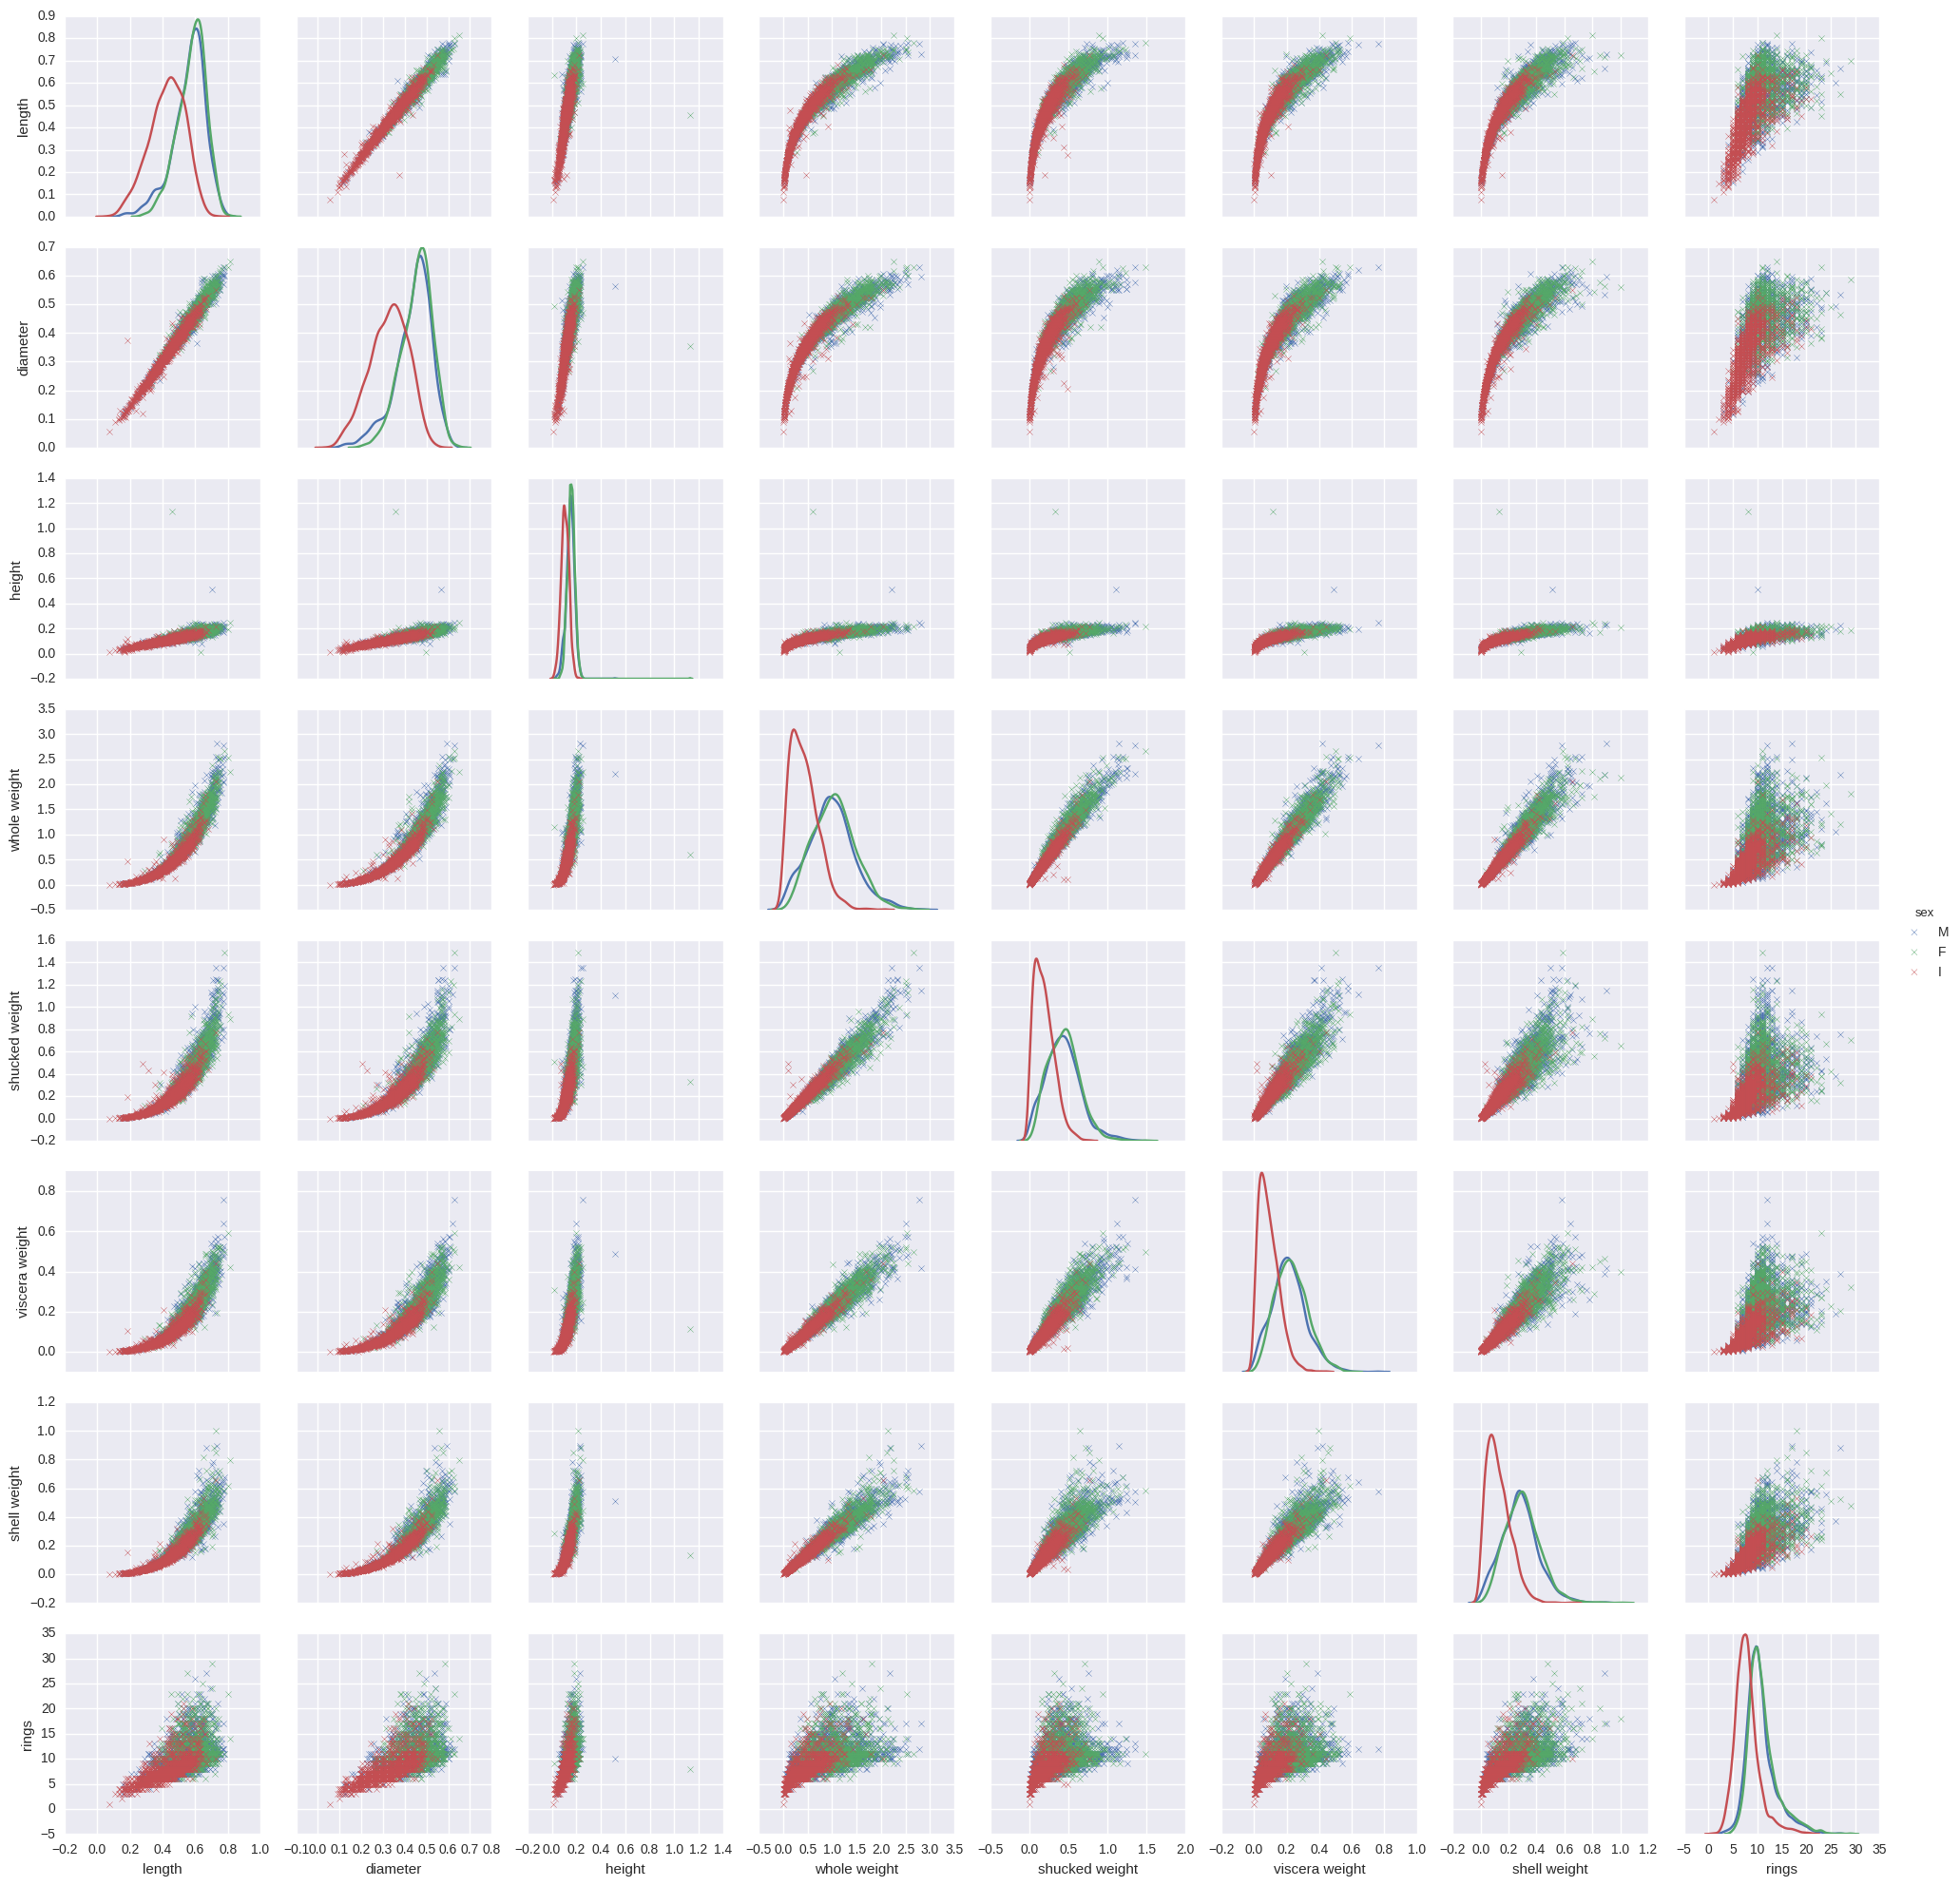

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde")
plt.show()

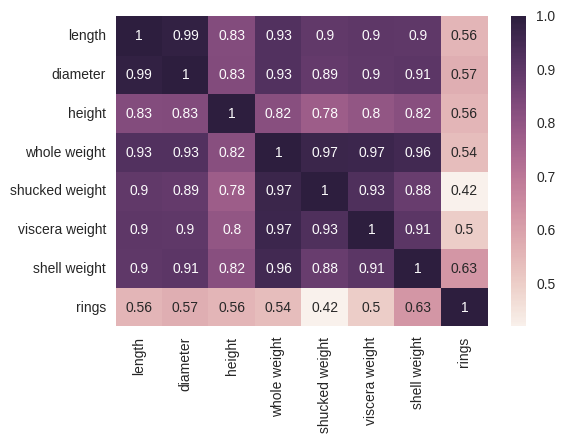

In [17]:
%matplotlib inline
corr = abalone.corr()
sns.heatmap(corr, annot=True)
#plt.show()

### 독립변수, 종속변수 준비

'sex'는 명목변수이다. 각 각의 값에 대해 dummy 변수 Male, Female, Infant로 변환한다.

```python
sex        Male Female Infant
M          1     0     0
M       -> 1     0     0
F          0     1     0
M          1     0     0
I          0     0     1
```

In [8]:
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int)

### 회귀분석


sklearn 최신버전을 사용한다면 다음을 사용한다.

```python
from sklearn.model_selection import train_test_split
```

In [19]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(abalone,train_size=0.5)

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error

xtrain = train.drop(['rings','sex'],axis=1)
ytrain = train['rings']
xtest = test.drop(['rings','sex'],axis=1)
ytest = test['rings']

train, test 데이터의 컬럼이 원하는대로 포함되었는지 확인해보자.

In [21]:
print xtrain.head()

      length  diameter  height  whole weight  shucked weight  viscera weight  \
3607   0.515      0.39   0.140        0.6780          0.3410          0.1325   
2676   0.605      0.48   0.150        1.0790          0.4505          0.2835   
3076   0.680      0.56   0.195        1.6640          0.5800          0.3855   
2862   0.735      0.57   0.210        2.2355          1.1705          0.4630   
779    0.470      0.36   0.145        0.5370          0.1725          0.1375   

      shell weight  Male  Female  Infant  
3607        0.1190     1       0       0  
2676        0.2930     0       1       0  
3076        0.5450     0       1       0  
2862        0.5315     1       0       0  
779         0.1950     0       1       0  


In [22]:
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print regression.intercept_

6.2000971033e+13


In [24]:
print train.columns,regression.coef_

Index([u'sex', u'length', u'diameter', u'height', u'whole weight',
       u'shucked weight', u'viscera weight', u'shell weight', u'rings',
       u'Male', u'Female', u'Infant'],
      dtype='object') [ -8.04933394e-01   8.62895817e+00   3.00284804e+01   1.02443703e+01
  -2.13724186e+01  -1.33698427e+01   5.48956984e+00  -6.20009710e+13
  -6.20009710e+13  -6.20009710e+13]


컬럼명과 계수를 같이 붙여서 보면 편리하다.

In [25]:
zip(train.columns,regression.coef_)

[('sex', -0.80493339401858155),
 ('length', 8.6289581683434129),
 ('diameter', 30.028480369230358),
 ('height', 10.244370292629323),
 ('whole weight', -21.372418646025825),
 ('shucked weight', -13.369842666464052),
 ('viscera weight', 5.4895698444604211),
 ('shell weight', -62000971032995.508),
 ('rings', -62000971032995.391),
 ('Male', -62000971032996.297)]

### 정확성

방금 도출한 선형회귀식의 정확성을 계산해보자.

In [26]:
# Explained variance score: 1 is perfect prediction
accuracy = regression.score(xtest,ytest)
print(accuracy*100,'%')

(49.608444137865867, '%')


In [27]:
import numpy as np
print("Mean squared error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean squared error: 4.97


예측값과 실제값을 비교해보자.

In [28]:
ypred = regression.predict(xtest)

In [29]:
r2 = r2_score(ytest, ypred )
mae = mean_absolute_error(ytest, ypred)

print r2,mae

0.496084441379 1.60051858836


```flatten()```함수는 배열을 1차원으로 만들어 준다.

In [30]:
#_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred.head()

,Actual,Predicted
339,15,12.445312
39,9,7.984375
739,10,9.078125
1866,10,7.984375
4056,11,13.273438


아래 그림은 예측값 ypred, 실제값 ytest의 산포도를 보여주고 있다.
실선은 실제값 ytest이 예측값과 동일한 경우를 말한다. 즉 100% 정확한 경우를 의미한다.
데이터의 후반부는 **예측값이 약간 아래로 분포**함을 보여주고 있다.

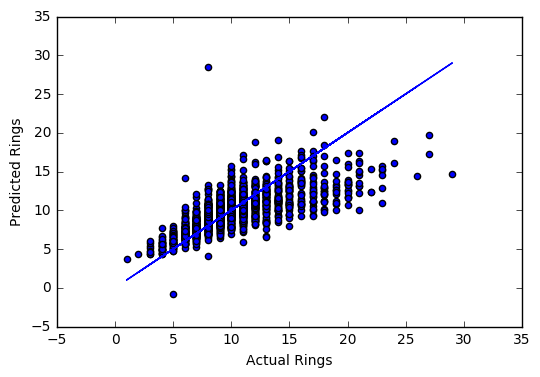

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)

## S.9 Ridge

**Ridge** 회귀는 OLS + L2 제약조건을 추가한 방식으로, 이 방법을 제안한 Andre Tikhonov의 이름을 따서 Tikhonov regularization라고도 한다.

최적화 문제:
* min $f=RSS=\sum_{i=1}^n(y_i-w_0 - \sum_{j=1}^p w_jx_{ij})^2$
* s.t. $\sum_{j=1}^p w_j^2 \le t$
* 상수 $w_0$는 식에서 제외

Lagrange multiplier 적용해서 풀 수 있다.

즉 f = $(y-wx)^2 + \lambda w^2$ 오류를 최소화 하는 w를 찾는다.

위 식의 앞 부분은 RSS이고 뒷 부분은 L2 제약조건이다

* 위 식에서 $\lambda \rightarrow 0$, $\beta_{ridge} \rightarrow \beta_{ols}$
    즉 L2 제약조건이 사라지게 된다.
* 반면 $\lambda \rightarrow \infty$, $\beta_{ridge} \rightarrow 0$
    즉, 제약조건이 증가하게 된다.

위를 미분하면 $\frac{\partial f}{\partial w} =
-2(x^Tx + \lambda I)w -2x^Ty$
* $\hat{w} = (X^T X + \lambda I) ^{-1} X^T y$
* Identity matrix: n × n square matrix with ones on the main diagonal and zeros elsewhere (np.eye와 동일)
* 계산식에서 $X^T X$의 결과가 square matrix (X의 열갯수의 정방형)이라서, Identity Matrix로 연산함.

* gradient descent

βj := βj - α[(1/m)Σ(yi-f(xi))(xi)+(λ/m)βj]

Ridge regression의 단점은:
* 최종 모델에 모든 속성을 포함하게 됨.
* $\lambda$ 값이 증가하면 w를 줄일 수 있지만 0으로 만들지 못함
    (즉, 속성 제거 불가능) (unless $\lambda = \infty$)

In [19]:
# new from here 20150516
# ridge
# lasso

def ridgeGradientDescent(x, y, alpha, iters, L):
    x=np.matrix(x)
    y=np.matrix(y).T
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        yhat = np.dot(x, beta)
        residuals = yhat - y
        MSE = (residuals.transpose()*residuals)/len(x)
        print "iteration:", i, "MSE:", MSE
        ols_gradient = np.dot(XT, residuals) / m
        beta = beta - alpha * (ols_gradient + (L/m)*beta)
    return beta

def ridgeWeights(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    xTxlamI = xTx + np.eye(np.shape(xMat)[1])*lam
    if linalg.det(xTxlamI) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTxlamI.I * (xMat.T*yMat)
    return ws


## S.10 Lasso

* ridge regression은 속성을 제거하지 못하지만, lasso는 속성을 제거할 수 있슴.
* Ridge regression과의 차이는 L1 norm penalty를 더함 (least absolute error)
* Minimize

$\sum (y-\hat{y})^2 \text{ s.t. }\sum_{j=1}^p w_j \le t$

* Lagrange multiplier 이용:
    f = $(y-wx)^2 + \lambda |w|$ 오류를 최소화 하는 w를 찾음.
* $\lambda$가 증가하게 되면, w가 0이 되는 속성이 생겨남. 변수제거 효과.

## S.11 비선형 모델

데이터가 선형적 관계를 가지고 있지 않을 경우, 
n차원 다항식 nth order polynomial을 표현하면 다음과 같다.

$\sum\limits_{i=0}^n a_i x^i$

이 경우 coefficients는 $a_n, a_{n-1},…,a_1, a_0$

**```poly1d(coefficients)```**는 위 계수를 가지고 다항식을 만들어 준다. 이를 통해 예측값을 찾을 수 있다.
예를 들면, ```coefficients```는 내림차순으로 승수를 리스트로 적어준다.
즉 아래는 5개이므로 승수 4, 3, 2, 1, 0에 대한 계수 가각 0.2, 0, 3, -7, 5를 적어준다.
그 결과:
$f(x) = \frac{x^4}{5} + 3x^2 - 7x + 5$

In [14]:
import numpy as np
f=np.poly1d( [ 0.2, 0, 3, -7, 5 ] )
print f

     4     2
0.2 x + 3 x - 7 x + 5


### 선형 polyfit

**x**는 0~19의 정수의 값을 가지도록 생성한다.
**y**는 기울기 slope 2, 절편 offset 3으로 하고 약간의 무작위수 ```np.random.normal()```를 더한다.

In [15]:
import numpy as np
npoints = 20
slope = 2
offset = 3
x = np.arange(npoints)
y = slope * x + offset + np.random.normal(size=npoints)

In [16]:
print x
print y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1.77608353   5.59955772   7.55541602   8.87716335  11.92814601
  14.4171071   16.25426965  18.32894541  17.74192128  21.12463775
  24.90267741  26.11171351  26.67922852  28.95163093  29.43969459
  33.22941748  33.75673063  37.76504434  38.05375411  41.75604863]


**```polyfit(x,y,deg)```** 함수는 데이터에 대한 회귀식을 구한다.
즉 데이터 x,y를, **deg는 차수**를 넣어준다.
즉 차수 1은 **선형** 즉 직선으로 y = mx + b 모델링하게 된다.

아래를 보면, x,y 데이터에 대해 1차식으로 회귀식을 구하여 계수와 절편을 계산해 준다.

In [17]:
p = np.polyfit(x,y,1)
print p

[ 1.96763692  3.51990862]


위 계수는 2개이므로, 1차원 식으로 만들어진다. 당연히 이 식은 예측 값을 출력할 때 사용한다.

In [18]:
f=np.poly1d(p)
print f

 
1.968 x + 3.52


그래프를 그려보자

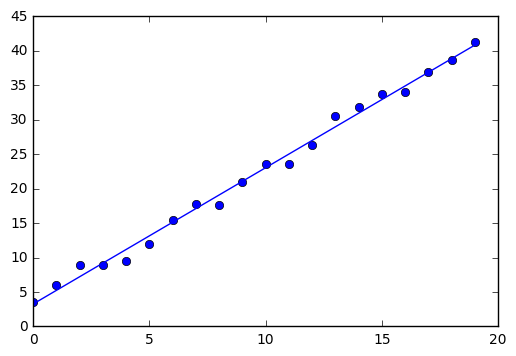

In [6]:
import matplotlib.pyplot as plt

f = np.poly1d(p)
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(x, y, 'bo', label="Data")
plt.plot(x,f(x), 'b-',label="Polyfit")
plt.show()

In [19]:
# numpy.lstsq(x,y)에서 x는 2차원 y는 1차원 배열.
y=range(1,5)
x=range(11,15)
xx=np.vstack((x,np.zeros(len(x)))) #또는 >>> [ [v,0] for v in x ]
#xx=[ [v,0] for v in x ]
np.linalg.lstsq(xx.T,y)
# (array([ 0.20634921,  0.        ]), array([], dtype=float64),
# 1, array([ 25.0998008,   0.       ]))

# 손으로 OLS 회귀분석 (inverse error)
p = (X.T * X).I * X.T * y
# np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
(p, residuals, rank, s) = np.lstsq(X, y)
p = np.polyfit(x, y, degree)

NameError: name 'X' is not defined

### 비선형 polyfit

In [20]:
# 1) numpy.poly1d one-dimensional polynomial class
import numpy as np

x=np.linspace(1,7,50)
y=np.sin(x)
x = np.array([10, 20, 30, 40, 50])
y = np.array([20, 40, 30, 10, 40])

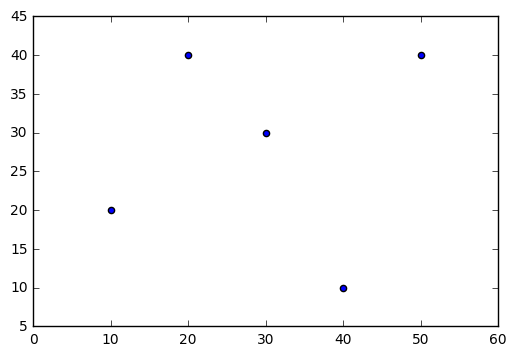

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [22]:
np.linspace(1,10,10)
#np.arange(1,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [23]:
coefficients=np.polyfit(x,y,3)
polynomial=np.poly1d(coefficients)
print "coefficients=",coefficients
print "polynomial=",polynomial

coefficients= [  6.66666667e-03  -5.92857143e-01   1.54047619e+01  -8.20000000e+01]
polynomial=           3          2
0.006667 x - 0.5929 x + 15.4 x - 82


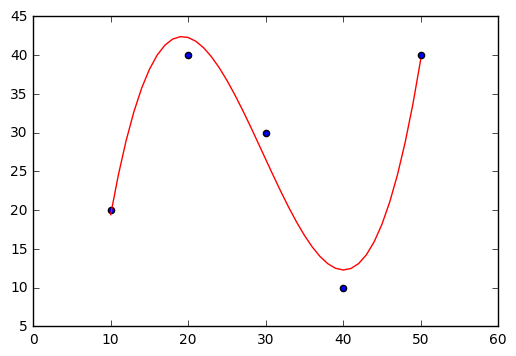

In [24]:
plt.scatter(x,y)
x50=np.arange(10,51)
plt.plot(x50,polynomial(x50),'r-')
plt.show()

### 미적분

```q(x) = 2x^2 - x + 3```를 예제로 미분해보자.

In [25]:
q=np.poly1d( [ 2, -1, 3 ] )
print q

   2
2 x - 1 x + 3


In [27]:
print q(0)
print q(1)
print q(2)

3
4
9


In [28]:
print q.deriv() #poly1d([ 4, -1])

 
4 x - 1


In [29]:
# integration 적분
print q.integ() #poly1d([ 0.66666667, -0.5       ,  3.        ,  0.        ])

        3       2
0.6667 x - 0.5 x + 3 x


In [30]:
# polyfit - least-squares polynomial fit
x=[0., 1., 2., 3., 4.]
y=[1., 2., 5., 10., 17.]
print x #[0.0, 1.0, 2.0, 3.0, 4.0]
print y #[1.0, 2.0, 5.0, 10.0, 17.0]
p=np.poly1d(np.polyfit(x,y,2))
print p #poly1d([  1.00000000e+00,  -4.10782519e-15,   1.00000000e+00])

#식을 출력
print "--------"
print "p=",p
print "--------"
print "q=",q

#식을 연산할 수도 있다
print "--------"
print "p+q=",p+q

[0.0, 1.0, 2.0, 3.0, 4.0]
[1.0, 2.0, 5.0, 10.0, 17.0]
   2
1 x - 4.338e-15 x + 1
--------
p=    2
1 x - 4.338e-15 x + 1
--------
q=    2
2 x - 1 x + 3
--------
p+q=    2
3 x - 1 x + 4


## 문제: iris

petal_length와 petal_width의 회귀분석을 해보자.

### 데이터 읽기

데이터를 UCI 웹사이트에서 읽어보자.
csv파일은 순수 데이터로만 구성되어 있어, 컬럼명```names```을 별도로 넣어준다.
데이터가 잘 읽혀졌는지 ```head()``` 함수로 일부 읽어보자.

In [10]:
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


```describe()```는 개수, 평균, 표준편차, 최대, 최소, 분기 값의 기본 통계량을 계산해 준다.
데이터 개수는 150개 서로 동일하다. 서로 다르면 **결측 값**이 있을 수 있다.
평균에 비해 표준편차가 너무 크지 않은지 살펴본다.
또한 최대, 최소를 비교해서 오류가 있는지, 예를 들면 마이너스 값이나 과도하게 큰 최대 값을 살펴본다.
**```outlier```**는 회귀식을 왜곡할 수 있어서 주의가 필요하다.

In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


```isnull()``` 함수로 missing values 결측 값이 있는지 확인한다.

In [14]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### petal 너비와 길이 그래프

우선 ```petal_length```와 ```petal_width``` 두 변수간 관계와 회귀선을 그래프로 그려보자.
```sns.lmplot()```는 입력변수 x, y, DataFrame을 인자로 넣어준다.
여기서 x, y는 DataFrame의 컬럼명을 적는다는 점에 주의한다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82947200d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8294584790>]], dtype=object)

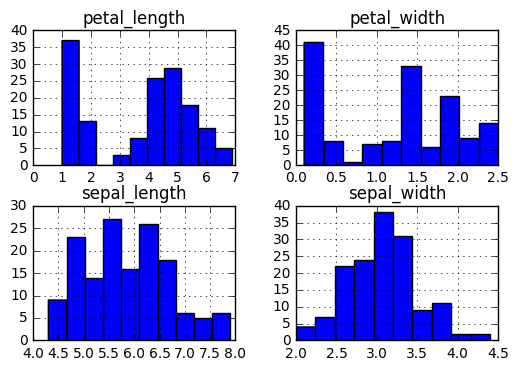

In [36]:
%matplotlib inline
iris.hist()

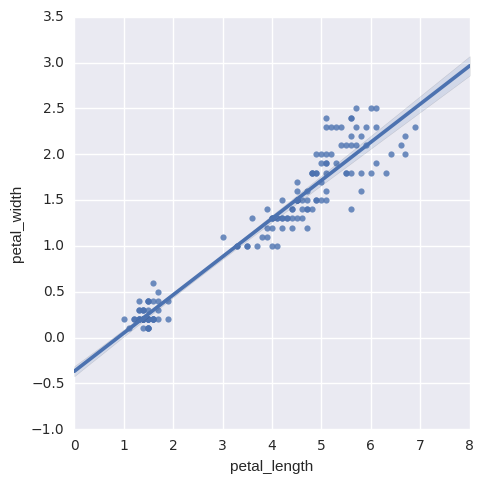

In [37]:
import seaborn as sns
sns.lmplot(x="petal_length", y="petal_width", data=iris)
sns.plt.show()

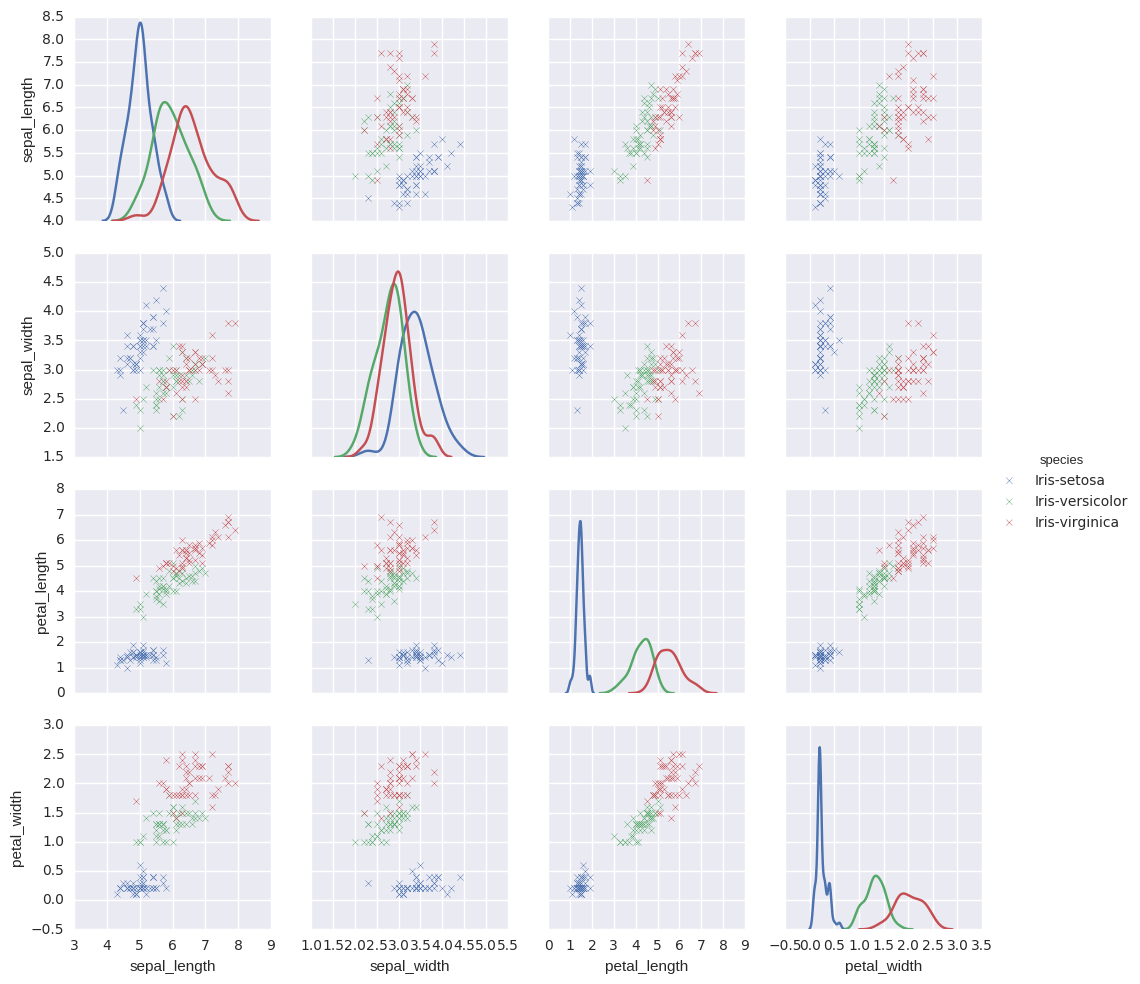

In [38]:
sns.pairplot(iris, hue='species', markers='x', diag_kind="kde")

### numpy 회귀분석

```petal_length```와 ```petal_width```를 회귀분석해보자.
x에는 절편을 도출하기 위해 1을 추가해준다.
따라서 x는 다음과 같이 만들어진다.

```python
[ 1.4,  1. ]
[ 1.4,  1. ]
[ 1.3,  1. ]
[ 1.5,  1. ]
```


In [15]:
import numpy as np
x=iris["petal_length"]
y=iris["petal_width"]
A=np.array([x,np.ones(len(x))])

In [16]:
print("A=", A.T[:5],"y=",y[:5])

('A=', array([[ 1.4,  1. ],
       [ 1.4,  1. ],
       [ 1.3,  1. ],
       [ 1.5,  1. ],
       [ 1.4,  1. ]]), 'y=', 0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64)


numpy의 최소자승법 결과는 [ 0.41641913, -0.36651405]이다.
이는 y=ax+b에서 a=-0.36651405, b=0.41641913이다.

In [17]:
print("Least Sq: ",np.linalg.lstsq(A.T,y))

('Least Sq: ', (array([ 0.41641913, -0.36651405]), array([ 6.34349195]), 2, array([ 52.03171411,   5.06958846])))


```vander(x,n)``` 함수를 사용해도 된다. 역시 같은 결과가 도출된다.
**1차원 배열 x**, **정수 n**을 받아서, **Van der Monde 매트릭스**를 생성한다.
첫째 컬럼은 $x^{n-1}$, 두번째는 $x^{n-2}$와 같이 생성된다.

In [18]:
Av = np.vander(x, 2)  #add a constant row for an intercept
print(Av[:5])
np.linalg.lstsq(Av,y)

[[ 1.4  1. ]
 [ 1.4  1. ]
 [ 1.3  1. ]
 [ 1.5  1. ]
 [ 1.4  1. ]]


(array([ 0.41641913, -0.36651405]),
 array([ 6.34349195]),
 2,
 array([ 52.03171411,   5.06958846]))

### statsmodels 회귀분석

입력값은 x의 Transpose인 A.T로 입력값을 적어준다.
그 결과는 R의 결과값과 같이 출력된다.
results coef의 x1, const의 값이 동일하게 도출된다.

In [20]:
import statsmodels.api as sm

model = sm.OLS(y, A.T)

In [21]:
results = model.fit()

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.78e-86
Time:                        09:51:50   Log-Likelihood:                 24.400
No. Observations:                 150   AIC:                            -44.80
Df Residuals:                     148   BIC:                            -38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4164      0.010     43.320      0.0

### sklearn 회귀분석

앞과 동일하게, 입력값은 x의 Transpose인 A.T로 입력값을 적어준다.

In [30]:
from sklearn.linear_model import LinearRegression
x = iris["petal_length"]
y = iris["petal_width"]
A=np.array([x,np.ones(len(x))])

In [31]:
model = LinearRegression()

In [32]:
results = model.fit(A.T, y)

In [33]:
print results.intercept_, results.coef_

-0.366514045217 [ 0.41641913  0.        ]


### 모든 

```iris.values```의 모든 행, 열 0,1,2,3을 선택해보자.
종속변수를 

In [ ]:
x=iris.values[:,0:3]

4번째 속성을 선택하고 이를 2차원 행렬로 만들기 위해 ```np.newaxis()```를 넣었다.

In [ ]:
y=iris.values[:,np.newaxis,4]

In [34]:
print(x.shape, y.shape)

((150, 3), (150, 1))


model = LinearRegression()
results = model.fit(x.T, y)

print results.intercept_, results.coef_

species를 선택하여 dummy 변수로 만들었다.

In [43]:
dummies = pd.get_dummies(iris["species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


pandas에서 일부 커럼을 선별하는 경우에는 

In [ ]:
iris[['sepal_length','species']][:5]

## 문제: 주택가격의 예측

1978년 보스턴 지역에 위치한 주택 관련 범죄율 등 560건 수집되어 UCI Machine Learning Repository에서 제공하고 있다.
이 데이터로부터 회귀식을 도출해보자.

### 데이터

sklearn의 datasets를 사용하기로 한다.

In [2]:
from sklearn import datasets
boston=datasets.load_boston()

저장되어 있는 데이터 구분을 보자.
* ```data```는 말 그대로 원본 데이터
* ```feature_names```는 속성명
* ```DESCR```는 데이터 관련한 설명을 제공하고 있고
* ```target```은 종속변수 '주택가격'으로, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

In [3]:
print(boston.keys())

['data', 'feature_names', 'DESCR', 'target']


```boston.DESCR```를 사용해 데이터 관련 설명을 볼 수 있다.
주택관련 정보로서 다음과 같이 구성되어 있다.
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

In [4]:
print(boston.DESCR)[:1000]

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

데이터는 행 506, 열 13로 구성되어 있다.

In [5]:
print(boston.data.shape)

(506, 13)


속성명을 출력해보자.

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


주택가격에 대해 그래프를 그려보자.
```boston.data[행, 열]```로 표기한다. 예를 들어 ```[:,1]```는 1열의 모든 행을 의미한다. 

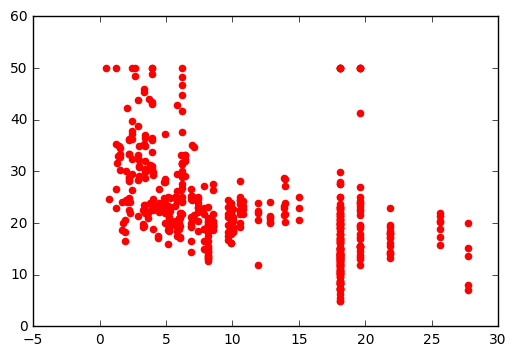

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(boston.data[:,2],boston.target,color='r')
plt.show()


### X,Y

데이터를 Pandas로 변환해서 일부를 출력해보자.

In [8]:
import pandas as pd
X=pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


X 데이터프레임에 Y를 추가하려면 간단하게 컬럼명을 정해주고 Y를 할당하면 된다.
```python
X['MEDV']=Y
```

boston.target을 종속변수로 설정하자. 

In [9]:
Y = pd.DataFrame(boston.target, columns=["MEDV"])

In [10]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 탐색

일부 "RM", "AGE", "RAD"의 상호 연관성을 그래프로 그려보자.

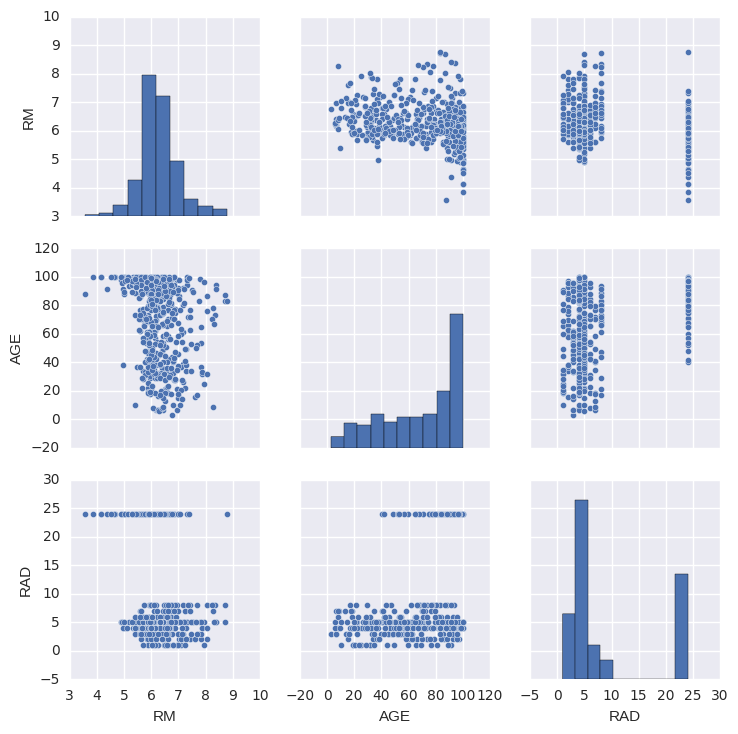

In [11]:
import seaborn as sns
cols = ["RM", "AGE", "RAD"]
sns.pairplot(X[cols])
plt.show()

각 속성의 통계량을 살펴보자.
데이터 개수는 506개로 서로 일치한다.
최소 값에 음수 값이 있는지, 평균 및 표준편차가 서로 많이 차이가 나는지 살펴본다. 

In [12]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 훈련데이터 분리

X,Y 데이터를 훈련용, 테스트용으로 분할한다.

버전에 따라 sklearn v0.18 이전에는 ```train_test_split```은 ```cross_validation```에 있었는데 그 후 변경되었다.
```python
from sklearn.cross_validation import train_test_split
```

In [13]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [14]:
Y_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((303, 1), (303, 1), (203, 13), (203, 1))

### 모델링

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

In [16]:
Y_pred.shape

(203, 1)

In [17]:
Y_pred.view()[:5]

array([[ 24.58155243],
       [ 24.51629253],
       [ 29.71379915],
       [ 12.51132696],
       [ 21.34965428]])

테스트 데이터에 대해 예측된 값과 실제를 비교해보자.
다중회귀분석이므로 2차원으로 그래프를 작성하는 것은 불가능하다.
예측값은 선형회귀선이므로 대각선을 가로지르는 선이 되고, 분포가 흩어져 있는만큼 오류가 된다.

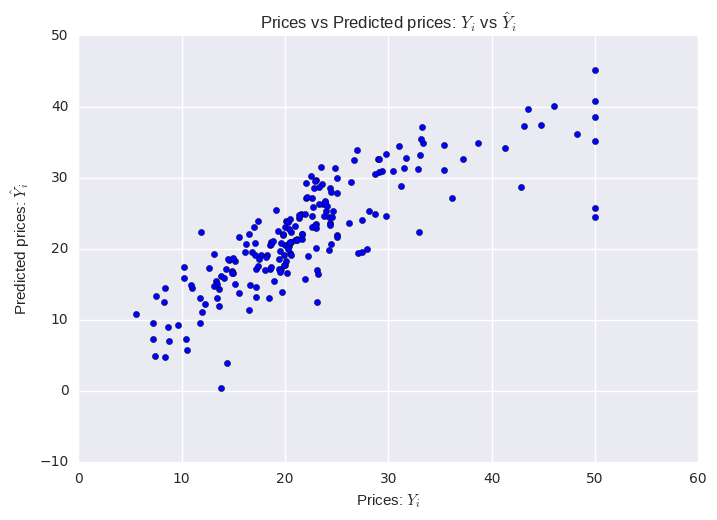

In [20]:
#plt.plot(Y_test,Y_pred, 'b+')
plt.scatter(Y_test,Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### 오류

In [21]:
import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

25.7971648592


### numpy로 listsq

In [22]:
import numpy as np
xarr=np.array(X)
yarr=np.array(Y)
print np.linalg.lstsq(xarr,yarr)

(array([[ -9.16297843e-02],
       [  4.86751203e-02],
       [ -3.77930006e-03],
       [  2.85636751e+00],
       [ -2.88077933e+00],
       [  5.92521432e+00],
       [ -7.22447929e-03],
       [ -9.67995240e-01],
       [  1.70443393e-01],
       [ -9.38925373e-03],
       [ -3.92425680e-01],
       [  1.49832102e-02],
       [ -4.16972624e-01]]), array([ 12231.2173457]), 13, array([  1.25851782e+04,   3.44594114e+03,   6.45756352e+02,
         4.02044555e+02,   1.59517723e+02,   1.21566801e+02,
         9.05757813e+01,   7.78697510e+01,   6.51102044e+01,
         2.46251860e+01,   1.80958484e+01,   5.51519014e+00,
         1.48089738e+00]))


### sklearn Lasso

위 ```numpy listsq```에서 만들었던 xarr, yarr데이터를 사용하자.
컬럼벡터 yarr.shape (506,1)를 **1d array**인 yarr.ravel().shape (506,)로 변경해준다.
안 그러면 Warning이 뜬다.

```ravel()``` 함수는 배열을 1d로 만들어 준다.
예를 들어, ```[[1 2 3] [4 5 6]]```를 ```[1 2 3 4 5 6]```으로 변환한다.

alphas는 L1에 적용되는 계수이다. 기본은 1이고, 0일 경우 보통의 OLS 방식과 동일하게 계산된다.

cross-validation 분할 방식을 정할 수 있는 모델이다.

In [32]:
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import KFold, cross_val_score

lasso = LassoCV(cv=3)
yhat_lasso = lasso.fit(xarr,yarr.ravel())

In [33]:
print yhat_lasso
#print "r^2 on test data : %f" % (1 - np.linalg.norm(y_test - y_pred_lasso) ** 2
#                                      / np.linalg.norm(y_test) ** 2)

LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)


In [34]:
yhat_lasso.coef_

array([-0.07391859,  0.04944576, -0.        ,  0.        , -0.        ,
        1.80092396,  0.01135702, -0.81333654,  0.27206588, -0.01542027,
       -0.74314538,  0.00898036, -0.70409988])

#### Lasso

Lasso를 연습으로 실행해보자.

In [49]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
print(clf.coef_, clf.intercept_)

(array([ 0.85,  0.  ]), 0.15000000000000002)


3,3과 4,4에 대해 예측을 해보자.
위에 출력한 계수로 계산을 맞추어보면 일치한다.
예를 들어, $2.7 = 0.85 \times 3 + 0 \times 3 + 0.15$

In [51]:
print clf.predict([[3,3],[4,4]])

[ 2.7   3.55]


### sklearn Ridge

In [176]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.01)
r.fit(xarr, yarr)
print(r.score(xarr, yarr))

0.740607266987


In [179]:
r.coef_

array([[ -0.10711135,   0.04641108,   0.02037691,   2.68683789,
        -17.68106763,   3.80566015,   0.00064898,  -1.4740674 ,
          0.3053845 ,  -0.01233842,  -0.95219114,   0.00939847,
         -0.52559349]])

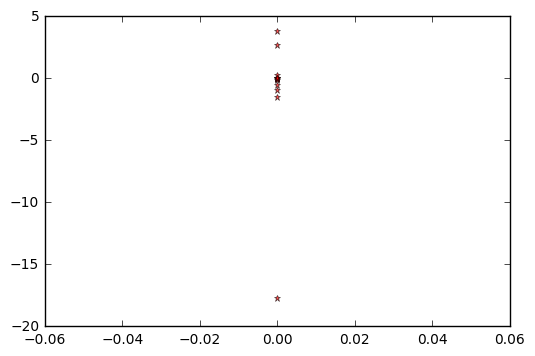

In [181]:
import matplotlib.pyplot as plt
plt.plot(r.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

### statsmodels

In [52]:
import statsmodels.api as sm
# Fit and make the predictions by the model
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:56:10   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008        -0.159    -0.024
ZN             0.0487      0.014      3.379      0.001         0.020     0.077
INDUS         -0.0038      0.064     -0.059      0.953        -0.130     0.123
CHAS           2.8564      0.904      3.160      0.002         1.080     4.633
NOX           -2.8808      3.359     -0.858      0.392        -9.481     3.720
RM             5.9252      0.309     19.168      0.000         5.318     6.533
AGE           -0.0072      0.014     -0.523      0.601        -0.034     0.020
DIS           -0.9680      0.196     -4.947      0.000        -1.352    -0.584
RAD            0.1704      0.067      2.554      0.011         0.039     0.302
TAX           -0.0094      0.004     -2.393      0.017        -0.017    -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000        -0.608    -0.177
B              0.0150      0.003      5.561      0.000         0.010     0.020
LSTAT         -0.4170      0.051     -8.214      0.000        -0.517    -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## S.12 Spark

In [2]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

### Jupyter에서 Python3을 사용하기

Python2 대신 Python3을 사용하려면, 다음 환경변수를 설정한다.
```python
$ vi $SPARK_HOME/conf/spark-env.sh
Goto the bottom of the file and copy paste these lines

export PYSPARK_PYTHON=python3
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS="notebook"
```

Notebook에서는 다음과 같이 ```PYSPARK_PYTHON```, ```PYSPARK_DRIVER_PYTHON```을 python3로 설정한다.

In [3]:
os.environ["PYSPARK_PYTHON"]=os.path.join('/usr','local','bin','python3')
os.environ["PYSPARK_DRIVER_PYTHON"]=os.path.join('/usr','local','bin','python3')

### spark 생성

In [19]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 데이터 생성

sklearn 데이터를 Pandas를 경유해 생성.

#### boston.data와 boston.target 데이터를 어떻게 합치나

두 데이터를 합치려면 shape을 알아야 한다.
(506, 13)과 (506,)를 합쳐서 (506,14)로 만들자.


In [26]:
print("boston data: ", type(boston.data), boston.data.shape)
print("boston data: ", type(boston.target), boston.target.shape)

('boston data: ', <type 'numpy.ndarray'>, (506, 13))
('boston data: ', <type 'numpy.ndarray'>, (506,))


#### (n,)과 (n,1)의 차이

잠깐 (n,)과 (n,1)은 서로 다른 행렬이라는 점에 주의한다.
```python
#(4,1) 4 x 1 2차원 array
[[1],
 [2],
 [3],
 [4]]
#(4,) 길이 4인 array
[1,2,3,4]
```

이 경우 ```column_stack()``` 함수로 두 행렬을 합칠 수 있다.
이 때 두 행렬을 괄호로 묶어주어야 한다.

In [27]:
v1=np.array([[1],[2],[3],[4]])
print(v1.shape)
v2=np.array([1,2,3,4])
print(v2.shape)

(4, 1)
(4,)


In [28]:
v3=[[11,22],[33,44],[55,66],[77,88]]
np.column_stack((v3,v2))

array([[11, 22,  1],
       [33, 44,  2],
       [55, 66,  3],
       [77, 88,  4]])

#### boston.data와 boston.target 데이터를 합치기

컬럼명도 합쳐보자.

In [29]:
import numpy as np
XY=np.column_stack((boston.data, boston.target))

In [30]:
np.append(boston.feature_names,"MEDV")

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], 
      dtype='|S7')

numpy에서 데이터를 읽으면 data type을 재정의해주어야 한다. 따라서 Pandas를 경유해서 Spark DataFrame으로 읽어온다.

In [31]:
import pandas as pd

#X=pd.DataFrame(boston.data, columns=boston.feature_names)
#Y=pd.DataFrame(boston.target, columns=["MEDV"])
Z=pd.DataFrame(XY, columns=np.append(boston.feature_names,"MEDV"))

In [32]:
Z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [145]:
Z.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 

In [33]:
from pyspark.sql.types import FloatType
bos=spark.createDataFrame(Z)

In [34]:
bos.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



In [35]:
bos.head()

Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1.0, TAX=296.0, PTRATIO=15.3, B=396.9, LSTAT=4.98, MEDV=24.0)

 'MEDV'는 제외하고 features를 만든다.

In [36]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
bosFeatures = vectorAssembler.transform(bos)
#vhouse_df = vhouse_df.select(['features', 'MV'])
bosFeatures.show(10)

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|            features|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87| 0.0|0.5

In [16]:
bosFeatures.dtypes

[('CRIM', 'double'),
 ('ZN', 'double'),
 ('INDUS', 'double'),
 ('CHAS', 'double'),
 ('NOX', 'double'),
 ('RM', 'double'),
 ('AGE', 'double'),
 ('DIS', 'double'),
 ('RAD', 'double'),
 ('TAX', 'double'),
 ('PTRATIO', 'double'),
 ('B', 'double'),
 ('LSTAT', 'double'),
 ('MEDV', 'double'),
 ('features', 'vector')]

In [37]:
bosFeatures.describe()

DataFrame[summary: string, CRIM: string, ZN: string, INDUS: string, CHAS: string, NOX: string, RM: string, AGE: string, DIS: string, RAD: string, TAX: string, PTRATIO: string, B: string, LSTAT: string, MEDV: string]

In [38]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MEDV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(bosFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.033105731387,0.00928315690178,0.0,2.24678232414,-7.2191724694,4.34760874657,0.0,-0.602323084122,0.0,0.0,-0.822234533043,0.00811987742042,-0.503757321707]
Intercept: 20.0107307055


In [48]:
_Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
